In [3]:
import pandas as pd

# Lee el archivo CSV
df = pd.read_csv('mnist.csv')

# Extrae la columna 'label' y la guarda en una variable
label_column = df['label']

# Elimina la columna 'label' del DataFrame original
df = df.drop(columns=['label'])

# Agrega la columna 'label' al final del DataFrame
df['label'] = label_column

# Guarda el DataFrame modificado en un nuevo archivo CSV
df.to_csv('mnist_etique.csv', index=False)


In [5]:
import pandas as pd

# Lee el archivo CSV
df = pd.read_csv('mnist_etique.csv')

# Calcula la mitad del DataFrame
mitad = len(df) // 2

# Divide el DataFrame en dos partes
df1 = df.iloc[:mitad, :]
df2 = df.iloc[mitad:, :]

# Asegura que la columna 'label' esté presente en ambos DataFrames
if 'label' not in df1.columns:
    df1.insert(0, 'label', df['label'])
if 'label' not in df2.columns:
    df2.insert(0, 'label', df['label'])

# Guarda las dos partes en archivos CSV separados con la columna 'label'
df1.to_csv('mnist_trainnuevo.csv', index=False)
df2.to_csv('mnist_pred.csv', index=False)


In [6]:
import numpy as np
import pandas as pd

# Cargar los datos originales
train_data = pd.read_csv('mnist_trainnuevo.csv')
test_data = pd.read_csv('mnist_test.csv')

# Imprimir información antes de la separación y el reshape
print("Datos originales:")
print("Forma de x_train antes del reshape:", train_data.iloc[:, 1:].shape)
print("Forma de x_test antes del reshape:", test_data.iloc[:, 1:].shape)

# Separar características y etiquetas
x_train = train_data.iloc[:, 1:].values / 255.0
y_train = train_data['label'].values
x_test = test_data.iloc[:, 1:].values / 255.0
y_test = test_data['label'].values

# Imprimir información después de la separación
print("\nDatos después de la separación:")
print("Forma de x_train después del reshape:", x_train.shape)
print("Forma de x_test después del reshape:", x_test.shape)

# Reshape de las imágenes a 28x28
x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)

# Imprimir información después del reshape
print("\nDatos después del reshape a 28x28:")
print("Forma de x_train después del reshape:", x_train.shape)
print("Forma de x_test después del reshape:", x_test.shape)

# Crear DataFrames para las mitades izquierda y derecha con relleno horizontal
left_with_padding = []
right_with_padding = []

for image in x_train:
    mid = image.shape[1] // 2  # Calcular el punto medio horizontal
    sample_left = image[:, :mid]  # Mitad izquierda
    sample_right = image[:, mid:]  # Mitad derecha
    
    # Rellenar la parte izquierda con la parte derecha para que sean de 28x28
    sample_left_28x28 = np.pad(sample_left, ((0, 0), (0, mid)), mode='constant', constant_values=0)
    sample_right_28x28 = np.pad(sample_right, ((0, 0), (mid, 0)), mode='constant', constant_values=0)
    
    left_with_padding.append(sample_left_28x28.flatten())
    right_with_padding.append(sample_right_28x28.flatten())

    # Imprimir algunas muestras para verificar
    if len(left_with_padding) % 1000 == 0:
        print(f"Procesadas {len(left_with_padding)} muestras.")

# Convertir a DataFrames
left_df = pd.DataFrame(data=left_with_padding)
right_df = pd.DataFrame(data=right_with_padding)

# Agregar etiquetas de región a los DataFrames


# Agregar las etiquetas originales a los DataFrames
left_df['label'] = y_train
right_df['label'] = y_train

# Guardar los DataFrames en archivos CSV
left_df.to_csv('mnist_izquierdageneral.csv', index=False)
right_df.to_csv('mnist_derechageneral.csv', index=False)


Datos originales:
Forma de x_train antes del reshape: (30000, 784)
Forma de x_test antes del reshape: (10000, 784)

Datos después de la separación:
Forma de x_train después del reshape: (30000, 784)
Forma de x_test después del reshape: (10000, 784)

Datos después del reshape a 28x28:
Forma de x_train después del reshape: (30000, 28, 28)
Forma de x_test después del reshape: (10000, 28, 28)
Procesadas 1000 muestras.
Procesadas 2000 muestras.
Procesadas 3000 muestras.
Procesadas 4000 muestras.
Procesadas 5000 muestras.
Procesadas 6000 muestras.
Procesadas 7000 muestras.
Procesadas 8000 muestras.
Procesadas 9000 muestras.
Procesadas 10000 muestras.
Procesadas 11000 muestras.
Procesadas 12000 muestras.
Procesadas 13000 muestras.
Procesadas 14000 muestras.
Procesadas 15000 muestras.
Procesadas 16000 muestras.
Procesadas 17000 muestras.
Procesadas 18000 muestras.
Procesadas 19000 muestras.
Procesadas 20000 muestras.
Procesadas 21000 muestras.
Procesadas 22000 muestras.
Procesadas 23000 muestr

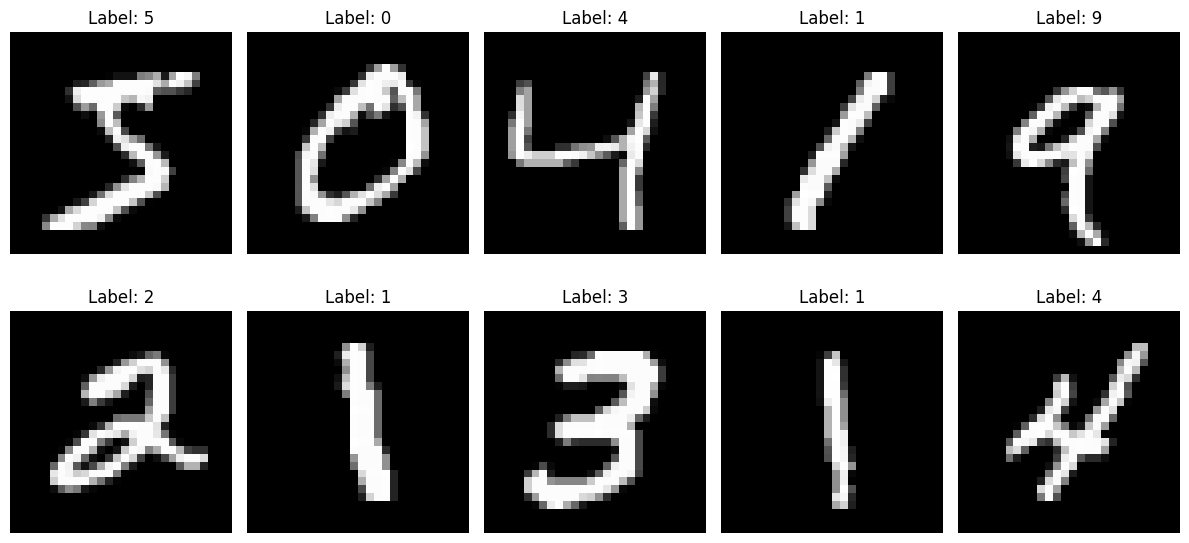

Imagen guardada como 'mnist_digits_from_csv.png'


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el conjunto de datos desde el archivo CSV
data = pd.read_csv('mnist_trainnuevo.csv')

# Supongamos que los datos están en columnas separadas: pixel1, pixel2, ..., pixel784, label
# Ajusta esto según la estructura de tu archivo CSV

# Extraer las etiquetas y los píxeles
labels = data['label']
pixels = data.drop('label', axis=1)

# Mostrar los primeros 10 dígitos del conjunto de datos
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()

for i in range(10):
    # Reorganizar los píxeles en una matriz de 28x28
    img = np.array(pixels.iloc[i]).reshape(28, 28)
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Label: {labels.iloc[i]}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Guardar los primeros 10 dígitos del conjunto de datos en una imagen
fig.savefig('mnist_digits_from_csv.png')
print("Imagen guardada como 'mnist_digits_from_csv.png'")


In [2]:
import numpy as np
import pandas as pd

# Cargar los datos originales
test_data = pd.read_csv('mnist_pred.csv')
#test_data = pd.read_csv('mnist_test.csv')

# Imprimir información antes de la separación y el reshape
print("Datos originales:")
#print("Forma de x_train antes del reshape:", train_data.iloc[:, 1:].shape)
print("Forma de x_test antes del reshape:", test_data.iloc[:, 1:].shape)

# Separar características y etiquetas
#x_train = train_data.iloc[:, 1:].values / 255.0
#y_train = train_data['label'].values
x_test = test_data.iloc[:, 1:].values / 255.0
y_test = test_data['label'].values

# Imprimir información después de la separación
print("\nDatos después de la separación:")
#print("Forma de x_train después del reshape:", x_train.shape)
print("Forma de x_test después del reshape:", x_test.shape)

# Reshape de las imágenes a 28x28
#x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)

# Imprimir información después del reshape
print("\nDatos después del reshape a 28x28:")
#print("Forma de x_train después del reshape:", x_train.shape)
print("Forma de x_test después del reshape:", x_test.shape)

# Crear DataFrames para las mitades izquierda y derecha con relleno horizontal
left_with_padding = []
right_with_padding = []

for image in x_test:
    mid = image.shape[1] // 2  # Calcular el punto medio horizontal
    sample_left = image[:, :mid]  # Mitad izquierda
    sample_right = image[:, mid:]  # Mitad derecha
    
    # Rellenar la parte izquierda con la parte derecha para que sean de 28x28
    sample_left_28x28 = np.pad(sample_left, ((0, 0), (0, mid)), mode='constant', constant_values=0)
    sample_right_28x28 = np.pad(sample_right, ((0, 0), (mid, 0)), mode='constant', constant_values=0)
    
    left_with_padding.append(sample_left_28x28.flatten())
    right_with_padding.append(sample_right_28x28.flatten())

    # Imprimir algunas muestras para verificar
    if len(left_with_padding) % 1000 == 0:
        print(f"Procesadas {len(left_with_padding)} muestras.")

# Convertir a DataFrames
left_df = pd.DataFrame(data=left_with_padding)
right_df = pd.DataFrame(data=right_with_padding)

# Agregar etiquetas de región a los DataFrames


# Agregar las etiquetas originales a los DataFrames
left_df['label'] = y_test
right_df['label'] = y_test

# Guardar los DataFrames en archivos CSV
left_df.to_csv('mnist_izquierdageneral_test.csv', index=False)
right_df.to_csv('mnist_derechageneral_test.csv', index=False)


Datos originales:
Forma de x_test antes del reshape: (30000, 784)

Datos después de la separación:
Forma de x_test después del reshape: (30000, 784)

Datos después del reshape a 28x28:
Forma de x_test después del reshape: (30000, 28, 28)
Procesadas 1000 muestras.
Procesadas 2000 muestras.
Procesadas 3000 muestras.
Procesadas 4000 muestras.
Procesadas 5000 muestras.
Procesadas 6000 muestras.
Procesadas 7000 muestras.
Procesadas 8000 muestras.
Procesadas 9000 muestras.
Procesadas 10000 muestras.
Procesadas 11000 muestras.
Procesadas 12000 muestras.
Procesadas 13000 muestras.
Procesadas 14000 muestras.
Procesadas 15000 muestras.
Procesadas 16000 muestras.
Procesadas 17000 muestras.
Procesadas 18000 muestras.
Procesadas 19000 muestras.
Procesadas 20000 muestras.
Procesadas 21000 muestras.
Procesadas 22000 muestras.
Procesadas 23000 muestras.
Procesadas 24000 muestras.
Procesadas 25000 muestras.
Procesadas 26000 muestras.
Procesadas 27000 muestras.
Procesadas 28000 muestras.
Procesadas 2900

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Cargar el archivo CSV
df = pd.read_csv('mnist_trainnuevo.csv')

# Separar características y etiquetas
X = df.drop('label', axis=1).values
y = df['label'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)

# Convertir los datos bidimensionales a tensores 4D
X_train = X_train.reshape(-1, 28, 28, 1)  # Asumiendo imágenes de 28x28 píxeles
X_test = X_test.reshape(-1, 28, 28, 1)

# Construir el modelo
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
# Guardar el modelo en un archivo HDF5
model.save('mnist_cnn_model_completa.h5')
print('Modelo guardado exitosamente.')

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_acc}')


(24000, 784)
(6000, 784)
Epoch 1/10
750/750 [==============================] - 10s 13ms/step - loss: 0.4155 - accuracy: 0.8760 - val_loss: 0.1620 - val_accuracy: 0.9523
Epoch 2/10
750/750 [==============================] - 9s 13ms/step - loss: 0.1907 - accuracy: 0.9448 - val_loss: 0.1240 - val_accuracy: 0.9655
Epoch 3/10
750/750 [==============================] - 10s 13ms/step - loss: 0.1465 - accuracy: 0.9576 - val_loss: 0.1133 - val_accuracy: 0.9698
Epoch 4/10
750/750 [==============================] - 10s 13ms/step - loss: 0.1116 - accuracy: 0.9675 - val_loss: 0.1104 - val_accuracy: 0.9700
Epoch 5/10
750/750 [==============================] - 10s 13ms/step - loss: 0.0990 - accuracy: 0.9696 - val_loss: 0.0937 - val_accuracy: 0.9745
Epoch 6/10
750/750 [==============================] - 10s 13ms/step - loss: 0.0857 - accuracy: 0.9734 - val_loss: 0.0993 - val_accuracy: 0.9747
Epoch 7/10
750/750 [==============================] - 10s 13ms/step - loss: 0.0821 - accuracy: 0.9765 - val_loss

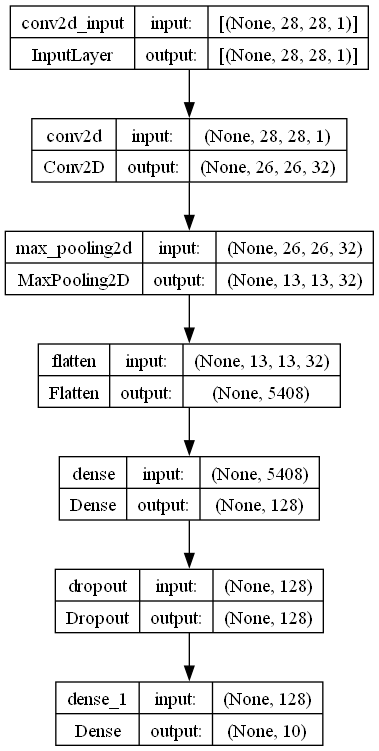

In [4]:
from tensorflow.keras.utils import plot_model

# Guardar el diagrama como una imagen
plot_model(model, to_file='modelo interno.png', show_shapes=True, show_layer_names=True)


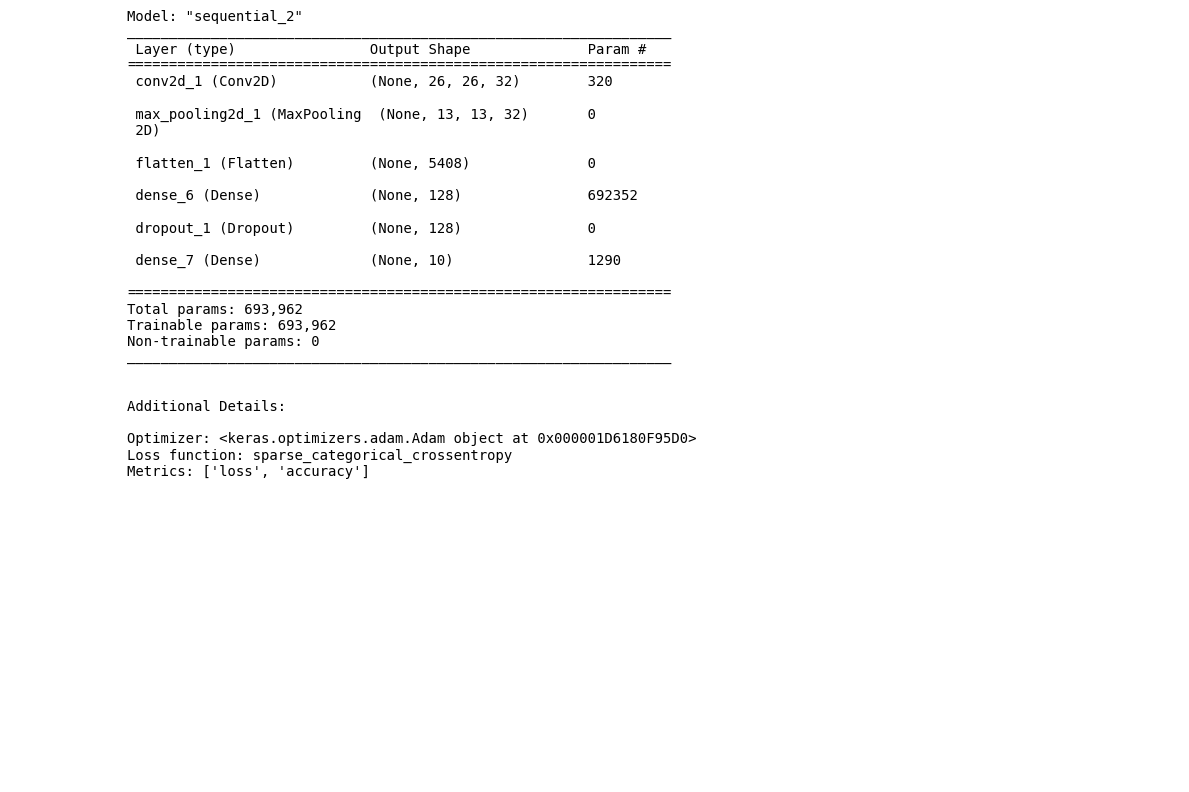

In [19]:

import matplotlib.pyplot as plt
from io import StringIO
from contextlib import redirect_stdout

# Crear un objeto StringIO para capturar la salida del método summary()
buffer = StringIO()

# Redirigir la salida del método summary() al objeto StringIO
with redirect_stdout(buffer):
    model.summary()

# Obtener la salida capturada como una cadena
model_summary = buffer.getvalue()

# Agregar detalles adicionales al resumen del modelo
additional_details = [
    f"Optimizer: {model.optimizer}",
    f"Loss function: {model.loss}",
    f"Metrics: {model.metrics_names}",
]

model_summary += "\n\nAdditional Details:\n\n" + "\n".join(additional_details)

# Crear y guardar la imagen con el resumen del modelo
fig = plt.figure(figsize=(12, 8))
plt.text(0.1, 0.5, model_summary, {'fontsize': 10}, fontfamily='monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('modelo_resumen.png')
plt.show()



In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Cargar el archivo CSV
df = pd.read_csv('mnist_izquierdageneral.csv')

# Separar características y etiquetas
X = df.drop('label', axis=1).values
y = df['label'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)

# Convertir los datos bidimensionales a tensores 4D
X_train = X_train.reshape(-1, 28, 28, 1)  # Asumiendo imágenes de 28x28 píxeles
X_test = X_test.reshape(-1, 28, 28, 1)

# Construir el modelo
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
# Guardar el modelo en un archivo HDF5
model.save('mnist_cnn_model_izquierda.h5')
print('Modelo guardado exitosamente.')

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_acc}')


(24000, 784)
(6000, 784)
Epoch 1/10
750/750 [==============================] - 10s 12ms/step - loss: 0.5384 - accuracy: 0.8385 - val_loss: 0.2559 - val_accuracy: 0.9238
Epoch 2/10
750/750 [==============================] - 9s 12ms/step - loss: 0.2944 - accuracy: 0.9133 - val_loss: 0.1971 - val_accuracy: 0.9408
Epoch 3/10
750/750 [==============================] - 9s 12ms/step - loss: 0.2441 - accuracy: 0.9287 - val_loss: 0.1804 - val_accuracy: 0.9462
Epoch 4/10
750/750 [==============================] - 9s 12ms/step - loss: 0.2073 - accuracy: 0.9377 - val_loss: 0.1565 - val_accuracy: 0.9503
Epoch 5/10
750/750 [==============================] - 9s 12ms/step - loss: 0.1883 - accuracy: 0.9438 - val_loss: 0.1708 - val_accuracy: 0.9528
Epoch 6/10
750/750 [==============================] - 9s 13ms/step - loss: 0.1755 - accuracy: 0.9477 - val_loss: 0.1463 - val_accuracy: 0.9572
Epoch 7/10
750/750 [==============================] - 9s 13ms/step - loss: 0.1613 - accuracy: 0.9537 - val_loss: 0.1

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Cargar el archivo CSV
df = pd.read_csv('mnist_derechageneral.csv')

# Separar características y etiquetas
X = df.drop('label', axis=1).values
y = df['label'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)

# Convertir los datos bidimensionales a tensores 4D
X_train = X_train.reshape(-1, 28, 28, 1)  # Asumiendo imágenes de 28x28 píxeles
X_test = X_test.reshape(-1, 28, 28, 1)

# Construir el modelo
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
# Guardar el modelo en un archivo HDF5
model.save('mnist_cnn_model_derecha.h5')
print('Modelo guardado exitosamente.')

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_acc}')


KeyError: "['label'] not found in axis"

In [5]:
import numpy as np
import pandas as pd

# Cargar los datos originales
train_data = pd.read_csv('mnist_trainnuevo.csv')

# Separar características y etiquetas
x_train = train_data.iloc[:, 1:].values / 255.0
y_train = train_data['label'].values

# Reshape de las imágenes a 28x28
x_train = x_train.reshape(-1, 28, 28)

# Crear DataFrames para las partes superior e inferior con fondo negro al otro lado
upper_with_padding = []
lower_with_padding = []

for image in x_train:
    mid = image.shape[0] // 2  # 50% para la parte superior
    mid2 = int(image.shape[0] * (3/4))
    sample_upper = image[mid:, :]
    sample_lower = image[:mid, :]  #50% para la parte inferior
    
    # Crear imágenes de 28x28 con fondo negro
    upper_with_padding_image = np.zeros((28, 28))
    lower_with_padding_image = np.zeros((28, 28))
    
    # Copiar la parte superior e inferior a las imágenes con fondo negro
    upper_with_padding_image[mid:, :] = sample_upper
    lower_with_padding_image[:mid, :] = sample_lower
    
    upper_with_padding.append(upper_with_padding_image.flatten())
    lower_with_padding.append(lower_with_padding_image.flatten())

# Convertir a DataFrames
upper_df = pd.DataFrame(data=upper_with_padding)
lower_df = pd.DataFrame(data=lower_with_padding)

# Agregar las etiquetas originales a los DataFrames
upper_df['label'] = y_train
lower_df['label'] = y_train

# Guardar los DataFrames en archivos CSV
upper_df.to_csv('mnist_arribasinlado.csv', index=False)
lower_df.to_csv('mnist_abajosinlado.csv', index=False)



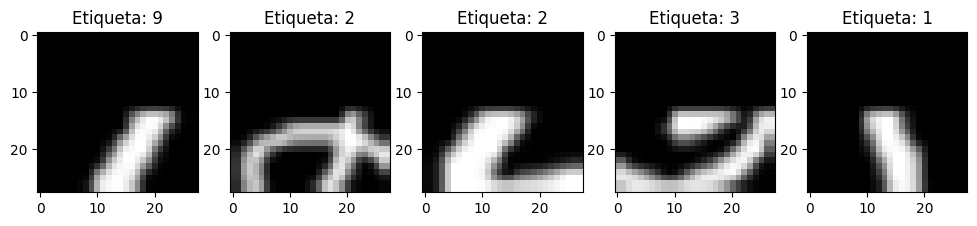

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo CSV que contiene los datos
data = pd.read_csv('mnist_zoomed_abajo.csv')

# Seleccionar un número de ejemplos que deseas visualizar
num_ejemplos = 5

# Elegir índices aleatorios para los ejemplos
indices_ejemplos = np.random.randint(0, len(data), num_ejemplos)

# Crear una figura con subplots para mostrar los ejemplos
fig, axs = plt.subplots(1, num_ejemplos, figsize=(12, 4))

for i, idx in enumerate(indices_ejemplos):
    ejemplo = data.iloc[idx, :-1].values  # Excluir la columna de etiquetas
    imagen = ejemplo.reshape(28, 28)  # Reshape a 28x28
    etiqueta = data.iloc[idx, -1]  # Última columna es la etiqueta

    axs[i].imshow(imagen, cmap='gray')
    axs[i].set_title(f'Etiqueta: {etiqueta}')

plt.show()


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Cargar el archivo CSV
df = pd.read_csv('mnist_arribasinlado.csv')

# Separar características y etiquetas
X = df.drop('label', axis=1).values
y = df['label'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)

# Convertir los datos bidimensionales a tensores 4D
X_train = X_train.reshape(-1, 28, 28, 1)  # Asumiendo imágenes de 28x28 píxeles
X_test = X_test.reshape(-1, 28, 28, 1)

# Construir el modelo
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
# Guardar el modelo en un archivo HDF5
model.save('mnist_cnn_model_arriba.h5')
print('Modelo guardado exitosamente.')

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_acc}')


(24000, 784)
(6000, 784)
Epoch 1/10
750/750 [==============================] - 10s 12ms/step - loss: 0.5140 - accuracy: 0.8394 - val_loss: 0.1558 - val_accuracy: 0.9600
Epoch 2/10
750/750 [==============================] - 9s 12ms/step - loss: 0.1784 - accuracy: 0.9504 - val_loss: 0.1026 - val_accuracy: 0.9717
Epoch 3/10
750/750 [==============================] - 9s 12ms/step - loss: 0.1219 - accuracy: 0.9680 - val_loss: 0.0609 - val_accuracy: 0.9845
Epoch 4/10
750/750 [==============================] - 9s 12ms/step - loss: 0.0973 - accuracy: 0.9731 - val_loss: 0.0520 - val_accuracy: 0.9875
Epoch 5/10
750/750 [==============================] - 9s 12ms/step - loss: 0.0706 - accuracy: 0.9804 - val_loss: 0.0504 - val_accuracy: 0.9893
Epoch 6/10
750/750 [==============================] - 9s 12ms/step - loss: 0.0729 - accuracy: 0.9810 - val_loss: 0.0594 - val_accuracy: 0.9908
Epoch 7/10
750/750 [==============================] - 9s 12ms/step - loss: 0.0577 - accuracy: 0.9831 - val_loss: 0.0

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Cargar el archivo CSV
df = pd.read_csv('mnist_zoomedderecha.csv')

# Separar características y etiquetas
X = df.drop('label', axis=1).values
y = df['label'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)

# Convertir los datos bidimensionales a tensores 4D
X_train = X_train.reshape(-1, 28, 28, 1)  # Asumiendo imágenes de 28x28 píxeles
X_test = X_test.reshape(-1, 28, 28, 1)

# Construir el modelo
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
# Guardar el modelo en un archivo HDF5
model.save('mnist_cnn_model_arribazoom.h5')
print('Modelo guardado exitosamente.')

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_acc}')


(24000, 784)
(6000, 784)
Epoch 1/10
750/750 [==============================] - 10s 12ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
750/750 [==============================] - 9s 12ms/step - loss: 2.3420e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
750/750 [==============================] - 9s 12ms/step - loss: 1.5005e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
750/750 [==============================] - 9s 12ms/step - loss: 1.0458e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
750/750 [==============================] - 9s 12ms/step - loss: 7.9688e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
750/750 [==============================] - 9s 13ms/step - loss: 7.2992e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
750/750 [==============================] - 9s 12ms/step - los

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Cargar el archivo CSV
df = pd.read_csv('mnist_arribasinlado.csv')

# Separar características y etiquetas
X = df.drop('label', axis=1).values
y = df['label'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir los datos bidimensionales a tensores 4D
X_train = X_train.reshape(-1, 28, 28, 1)  # Asumiendo imágenes de 28x28 píxeles
X_test = X_test.reshape(-1, 28, 28, 1)

# Cargar el modelo promediado como base
modelo_base = keras.models.load_model('modelo_promediado.h5')

# Construir el nuevo modelo utilizando la arquitectura del modelo promediado
model_nuevo = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Copiar los pesos del modelo promediado al nuevo modelo
model_nuevo.set_weights(modelo_base.get_weights())

# Compilar el nuevo modelo (puedes cambiar la configuración de compilación si es necesario)
model_nuevo.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Entrenar el nuevo modelo
model_nuevo.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Guardar el nuevo modelo entrenado
model_nuevo.save('mnist_cnn_model_arriba_con_promedio.h5')
print('Nuevo modelo guardado exitosamente.')

# Evaluar el nuevo modelo en el conjunto de prueba
test_loss_nuevo, test_acc_nuevo = model_nuevo.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba del nuevo modelo: {test_acc_nuevo}')


Epoch 1/10
750/750 [==============================] - 10s 12ms/step - loss: 0.2490 - accuracy: 0.9220 - val_loss: 0.0744 - val_accuracy: 0.9803
Epoch 2/10
750/750 [==============================] - 9s 12ms/step - loss: 0.0950 - accuracy: 0.9748 - val_loss: 0.0501 - val_accuracy: 0.9860
Epoch 3/10
750/750 [==============================] - 9s 12ms/step - loss: 0.0753 - accuracy: 0.9811 - val_loss: 0.0423 - val_accuracy: 0.9903
Epoch 4/10
750/750 [==============================] - 9s 12ms/step - loss: 0.0615 - accuracy: 0.9835 - val_loss: 0.0443 - val_accuracy: 0.9915
Epoch 5/10
750/750 [==============================] - 9s 12ms/step - loss: 0.0500 - accuracy: 0.9858 - val_loss: 0.0370 - val_accuracy: 0.9935
Epoch 6/10
750/750 [==============================] - 9s 12ms/step - loss: 0.0469 - accuracy: 0.9892 - val_loss: 0.0355 - val_accuracy: 0.9943
Epoch 7/10
750/750 [==============================] - 9s 12ms/step - loss: 0.0420 - accuracy: 0.9884 - val_loss: 0.0376 - val_accuracy: 0.993

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Cargar el archivo CSV
df = pd.read_csv('mnistt_abajo.csv')

# Separar características y etiquetas
X = df.drop('label', axis=1).values
y = df['label'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)

# Convertir los datos bidimensionales a tensores 4D
X_train = X_train.reshape(-1, 28, 28, 1)  # Asumiendo imágenes de 28x28 píxeles
X_test = X_test.reshape(-1, 28, 28, 1)

# Construir el modelo
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
# Guardar el modelo en un archivo HDF5
model.save('mnist_cnn_model_abajo.h5')
print('Modelo guardado exitosamente.')

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_acc}')


(23999, 784)
(6000, 784)
Epoch 1/10
750/750 [==============================] - 11s 13ms/step - loss: 0.6917 - accuracy: 0.7684 - val_loss: 0.4189 - val_accuracy: 0.8455
Epoch 2/10
750/750 [==============================] - 10s 13ms/step - loss: 0.4526 - accuracy: 0.8444 - val_loss: 0.3606 - val_accuracy: 0.8683
Epoch 3/10
750/750 [==============================] - 10s 13ms/step - loss: 0.3909 - accuracy: 0.8602 - val_loss: 0.3422 - val_accuracy: 0.8763
Epoch 4/10
750/750 [==============================] - 10s 13ms/step - loss: 0.3529 - accuracy: 0.8721 - val_loss: 0.3225 - val_accuracy: 0.8860
Epoch 5/10
750/750 [==============================] - 10s 13ms/step - loss: 0.3341 - accuracy: 0.8801 - val_loss: 0.3061 - val_accuracy: 0.8882
Epoch 6/10
750/750 [==============================] - 10s 13ms/step - loss: 0.3121 - accuracy: 0.8840 - val_loss: 0.3062 - val_accuracy: 0.8888
Epoch 7/10
750/750 [==============================] - 10s 13ms/step - loss: 0.3001 - accuracy: 0.8892 - val_los

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Cargar el archivo CSV
df = pd.read_csv('mnist_abajosinlado.csv')

# Separar características y etiquetas
X = df.drop('label', axis=1).values
y = df['label'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir los datos bidimensionales a tensores 4D
X_train = X_train.reshape(-1, 28, 28, 1)  # Asumiendo imágenes de 28x28 píxeles
X_test = X_test.reshape(-1, 28, 28, 1)

# Cargar el modelo promediado
modelo_promediado = keras.models.load_model('modelo_promediado.h5')

# Construir el nuevo modelo utilizando la arquitectura del modelo promediado
new_model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Copiar los pesos del modelo promediado al nuevo modelo
new_model.set_weights(modelo_promediado.get_weights())

# Compilar el nuevo modelo
new_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Entrenar el nuevo modelo
new_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Guardar el nuevo modelo en un archivo HDF5
new_model.save('mnist_cnn_model_abajo_con_promedio.h5')
print('Nuevo modelo guardado exitosamente.')

# Evaluar el nuevo modelo en el conjunto de prueba
test_loss, test_acc = new_model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_acc}')


Epoch 1/10
750/750 [==============================] - 10s 12ms/step - loss: 0.4705 - accuracy: 0.8547 - val_loss: 0.2748 - val_accuracy: 0.9150
Epoch 2/10
750/750 [==============================] - 9s 12ms/step - loss: 0.3130 - accuracy: 0.9015 - val_loss: 0.2440 - val_accuracy: 0.9232
Epoch 3/10
750/750 [==============================] - 9s 12ms/step - loss: 0.2736 - accuracy: 0.9150 - val_loss: 0.2432 - val_accuracy: 0.9280
Epoch 4/10
750/750 [==============================] - 9s 12ms/step - loss: 0.2478 - accuracy: 0.9208 - val_loss: 0.2367 - val_accuracy: 0.9315
Epoch 5/10
750/750 [==============================] - 9s 12ms/step - loss: 0.2263 - accuracy: 0.9274 - val_loss: 0.2285 - val_accuracy: 0.9365
Epoch 6/10
750/750 [==============================] - 9s 12ms/step - loss: 0.2257 - accuracy: 0.9303 - val_loss: 0.2307 - val_accuracy: 0.9320
Epoch 7/10
750/750 [==============================] - 9s 13ms/step - loss: 0.1992 - accuracy: 0.9365 - val_loss: 0.2338 - val_accuracy: 0.935

In [13]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model

# Cargar los modelos preentrenados
modelo1 = load_model('mnist_cnn_model_completa.h5')  # Reemplaza 'modelo1.h5' con el nombre real de tu modelo
modelo2 = load_model('mnist_cnn_model_derecha.h5')
modelo3 = load_model('mnist_cnn_model_izquierda.h5')
modelo4 = load_model('mnist_cnn_model_completa.h5')
modelo5 = load_model('mnist_cnn_model_derecha.h5')
modelo6 = load_model('mnist_cnn_model_izquierda.h5')
modelo7 = load_model('mnist_cnn_model_abajo.h5')
modelo8 = load_model('mnist_cnn_model_arriba.h5')
modelo9 = load_model('mnist_cnn_model_abajo.h5')
modelo10 = load_model('mnist_cnn_model_arriba.h5')

modelo11 = load_model('mnist_cnn_model_arriba_con_promedio.h5')
modelo12 = load_model('mnist_cnn_model_abajo_con_promedio.h5')
modelo13 = load_model('mnist_cnn_model_arriba_con_promedio.h5')
modelo14 = load_model('mnist_cnn_model_abajo_con_promedio.h5')

# Cargar los datos de entrada (CSV)
datos_csv1 = pd.read_csv('mnist_izquierdageneral_test.csv')  # Reemplaza 'datos_csv1.csv' con el nombre real de tu archivo CSV
datos_csv2 = pd.read_csv('mnist_derechageneral_test.csv')

# Guardar las etiquetas verdaderas antes de eliminar la columna 'label'
etiquetas_verdaderas_csv1 = datos_csv1['label'].values
etiquetas_verdaderas_csv2 = datos_csv2['label'].values

# Eliminar la columna 'label' de los datos de entrada
datos_csv1 = datos_csv1.drop('label', axis=1)
datos_csv2 = datos_csv2.drop('label', axis=1)

# Preprocesamiento de datos (ajústalo según tus necesidades)
# ...

# Reformatear los datos de entrada para que coincidan con las expectativas del modelo
datos_csv1 = datos_csv1.values.reshape(-1, 28, 28, 1)
datos_csv2 = datos_csv2.values.reshape(-1, 28, 28, 1)

# Realizar predicciones con los modelos
predicciones_csv1_modelo1 = modelo1.predict(datos_csv1)
predicciones_csv1_modelo2 = modelo2.predict(datos_csv1)
predicciones_csv1_modelo3 = modelo3.predict(datos_csv1)
predicciones_csv1_modelo9 = modelo9.predict(datos_csv1)
predicciones_csv1_modelo10 = modelo10.predict(datos_csv1)
#predicciones_csv1_modelo11 = modelo11.predict(datos_csv1)
#predicciones_csv1_modelo12 = modelo12.predict(datos_csv1)

predicciones_csv2_modelo4 = modelo4.predict(datos_csv2)
predicciones_csv2_modelo5 = modelo5.predict(datos_csv2)
predicciones_csv2_modelo6 = modelo6.predict(datos_csv2)
predicciones_csv2_modelo7 = modelo7.predict(datos_csv2)
predicciones_csv2_modelo8 = modelo8.predict(datos_csv2)
#predicciones_csv2_modelo13 = modelo13.predict(datos_csv1)
#predicciones_csv2_modelo14 = modelo14.predict(datos_csv1)
# Obtener las clases predichas
clases_predichas_csv1_modelo1 = np.argmax(predicciones_csv1_modelo1, axis=1)
clases_predichas_csv1_modelo2 = np.argmax(predicciones_csv1_modelo2, axis=1)
clases_predichas_csv1_modelo3 = np.argmax(predicciones_csv1_modelo3, axis=1)
clases_predichas_csv1_modelo9 = np.argmax(predicciones_csv1_modelo9, axis=1)
clases_predichas_csv1_modelo10 = np.argmax(predicciones_csv1_modelo10, axis=1)
#clases_predichas_csv1_modelo11 = np.argmax(predicciones_csv1_modelo11, axis=1)
#clases_predichas_csv1_modelo12 = np.argmax(predicciones_csv1_modelo12, axis=1)

clases_predichas_csv2_modelo4 = np.argmax(predicciones_csv2_modelo4, axis=1)
clases_predichas_csv2_modelo5 = np.argmax(predicciones_csv2_modelo5, axis=1)
clases_predichas_csv2_modelo6 = np.argmax(predicciones_csv2_modelo6, axis=1)
clases_predichas_csv2_modelo7 = np.argmax(predicciones_csv2_modelo7, axis=1)
clases_predichas_csv2_modelo8 = np.argmax(predicciones_csv2_modelo8, axis=1)

#clases_predichas_csv2_modelo13 = np.argmax(predicciones_csv2_modelo13, axis=1)
#clases_predichas_csv2_modelo14 = np.argmax(predicciones_csv2_modelo14, axis=1)


# Puedes guardar las predicciones junto con las etiquetas verdaderas en un nuevo archivo CSV
resultados_csv1 = pd.DataFrame({
    'Etiqueta_Verdadera': etiquetas_verdaderas_csv1,
    'Prediccion_Modelo1': clases_predichas_csv1_modelo1,
    'Prediccion_Modelo2': clases_predichas_csv1_modelo2,
    'Prediccion_Modelo3': clases_predichas_csv1_modelo3,
    'Prediccion_Modelo9': clases_predichas_csv1_modelo9,
    'Prediccion_Modelo10': clases_predichas_csv1_modelo10,
    #'Prediccion_Modelo11': clases_predichas_csv1_modelo11,
    #'Prediccion_Modelo12': clases_predichas_csv1_modelo12,
})

resultados_csv2 = pd.DataFrame({
    'Etiqueta_Verdadera': etiquetas_verdaderas_csv2,
    'Prediccion_Modelo4': clases_predichas_csv2_modelo4,
    'Prediccion_Modelo5': clases_predichas_csv2_modelo5,
    'Prediccion_Modelo6': clases_predichas_csv2_modelo6,
    'Prediccion_Modelo7': clases_predichas_csv2_modelo7,
    'Prediccion_Modelo8': clases_predichas_csv2_modelo8,
    #'Prediccion_Modelo13': clases_predichas_csv2_modelo13,
    #'Prediccion_Modelo14': clases_predichas_csv2_modelo14,
})

resultados_csv1.to_csv('resultados_csv1.csv', index=False)
resultados_csv2.to_csv('resultados_csv2.csv', index=False)
# Crear un DataFrame con una sola columna para las etiquetas verdaderas y predicciones de todos los modelos
resultados_totales = pd.DataFrame({
    'Etiqueta_Verdadera': etiquetas_verdaderas_csv1,  # O podrías usar etiquetas_verdaderas_csv2, ya que son iguales
    'Prediccion_Modelo1_csv1': clases_predichas_csv1_modelo1,
    'Prediccion_Modelo2_csv1': clases_predichas_csv1_modelo2,
    'Prediccion_Modelo3_csv1': clases_predichas_csv1_modelo3,
    'Prediccion_Modelo4_csv2': clases_predichas_csv2_modelo4,
    'Prediccion_Modelo5_csv2': clases_predichas_csv2_modelo5,
    'Prediccion_Modelo6_csv2': clases_predichas_csv2_modelo6,
    'Prediccion_Modelo9_csv1': clases_predichas_csv1_modelo9,
    'Prediccion_Modelo10_csv1': clases_predichas_csv1_modelo10,
    'Prediccion_Modelo7_csv2': clases_predichas_csv2_modelo7,
    'Prediccion_Modelo8_csv2': clases_predichas_csv2_modelo8,
    #'Prediccion_Modelo11_csv1': clases_predichas_csv1_modelo11,
    #'Prediccion_Modelo12_csv1': clases_predichas_csv1_modelo12,
    #'Prediccion_Modelo13_csv2': clases_predichas_csv2_modelo13,
    #'Prediccion_Modelo14_csv2': clases_predichas_csv2_modelo14,
})
#})
# Agregar una columna para representar la predicción del modelo (1: derecho, 2: izquierda, 3: completa)
#resultados_totales['lado'] = resultados_totales.apply(lambda row: 1 if 'Prediccion_Modelo2_csv1' in row.index and row['Prediccion_Modelo5_csv2'] == 1
                                                                   # else (2 if 'Prediccion_Modelo3_csv1' in row.index and row['Prediccion_Modelo6_csv2'] == 1
                                                                   # else 3), axis=1)



# Guardar el DataFrame en un archivo CSV
resultados_totales.to_csv('resultados_totales_dosgentetodoparcial.csv', index=False)
# resultados_totales_lado.csv ambos agentes más lado resultados_totales_unagente.csv agente izquierdo

938/938 [==============================] - 3s 3ms/step


In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model

# Cargar los modelos preentrenados
modelo1 = load_model('mnist_cnn_model_completa.h5')  # Reemplaza 'modelo1.h5' con el nombre real de tu modelo
modelo2 = load_model('mnist_cnn_model_derecha.h5')
modelo3 = load_model('mnist_cnn_model_izquierda.h5')
modelo9 = load_model('mnist_cnn_model_abajo.h5')
modelo10 = load_model('mnist_cnn_model_arriba.h5')


# Cargar los datos de entrada (CSV)
datos_csv1 = pd.read_csv('mnist_izquierdageneral_test.csv')  # Reemplaza 'datos_csv1.csv' con el nombre real de tu archivo CSV
datos_csv2 = pd.read_csv('mnist_derechageneral_test.csv')

# Guardar las etiquetas verdaderas antes de eliminar la columna 'label'
etiquetas_verdaderas_csv1 = datos_csv1['label'].values
etiquetas_verdaderas_csv2 = datos_csv2['label'].values

# Eliminar la columna 'label' de los datos de entrada
datos_csv1 = datos_csv1.drop('label', axis=1)
datos_csv2 = datos_csv2.drop('label', axis=1)

# Preprocesamiento de datos (ajústalo según tus necesidades)
# ...

# Reformatear los datos de entrada para que coincidan con las expectativas del modelo
datos_csv1 = datos_csv1.values.reshape(-1, 28, 28, 1)
datos_csv2 = datos_csv2.values.reshape(-1, 28, 28, 1)

# Realizar predicciones con los modelos
predicciones_csv1_modelo1 = modelo1.predict(datos_csv1)
predicciones_csv1_modelo2 = modelo2.predict(datos_csv1)
predicciones_csv1_modelo3 = modelo3.predict(datos_csv1)
predicciones_csv1_modelo9 = modelo9.predict(datos_csv1)
predicciones_csv1_modelo10 = modelo10.predict(datos_csv1)
#predicciones_csv1_modelo11 = modelo11.predict(datos_csv1)
#predicciones_csv1_modelo12 = modelo12.predict(datos_csv1)


# Obtener las clases predichas
clases_predichas_csv1_modelo1 = np.argmax(predicciones_csv1_modelo1, axis=1)
clases_predichas_csv1_modelo2 = np.argmax(predicciones_csv1_modelo2, axis=1)
clases_predichas_csv1_modelo3 = np.argmax(predicciones_csv1_modelo3, axis=1)
clases_predichas_csv1_modelo9 = np.argmax(predicciones_csv1_modelo9, axis=1)
clases_predichas_csv1_modelo10 = np.argmax(predicciones_csv1_modelo10, axis=1)
#clases_predichas_csv1_modelo11 = np.argmax(predicciones_csv1_modelo11, axis=1)
#clases_predichas_csv1_modelo12 = np.argmax(predicciones_csv1_modelo12, axis=1)



# Puedes guardar las predicciones junto con las etiquetas verdaderas en un nuevo archivo CSV
resultados_csv1 = pd.DataFrame({
    'Etiqueta_Verdadera': etiquetas_verdaderas_csv1,
    'Prediccion_Modelo1': clases_predichas_csv1_modelo1,
    'Prediccion_Modelo2': clases_predichas_csv1_modelo2,
    'Prediccion_Modelo3': clases_predichas_csv1_modelo3,
    'Prediccion_Modelo9': clases_predichas_csv1_modelo9,
    'Prediccion_Modelo10': clases_predichas_csv1_modelo10,
    #'Prediccion_Modelo11': clases_predichas_csv1_modelo11,
    #'Prediccion_Modelo12': clases_predichas_csv1_modelo12,
})


resultados_csv1.to_csv('resultados_csv1.csv', index=False)

# Crear un DataFrame con una sola columna para las etiquetas verdaderas y predicciones de todos los modelos
resultados_totales = pd.DataFrame({
    'Etiqueta_Verdadera': etiquetas_verdaderas_csv1,  # O podrías usar etiquetas_verdaderas_csv2, ya que son iguales
    'Prediccion_Modelo1_csv1': clases_predichas_csv1_modelo1,
    'Prediccion_Modelo2_csv1': clases_predichas_csv1_modelo2,
    'Prediccion_Modelo3_csv1': clases_predichas_csv1_modelo3,
    
    'Prediccion_Modelo9_csv1': clases_predichas_csv1_modelo9,
    'Prediccion_Modelo10_csv1': clases_predichas_csv1_modelo10,
    'Prediccion_Modelo1_csv2': clases_predichas_csv2_modelo1,
    'Prediccion_Modelo2_csv2': clases_predichas_csv2_modelo2,
    'Prediccion_Modelo3_csv2': clases_predichas_csv2_modelo3,
    
    'Prediccion_Modelo9_csv2': clases_predichas_csv2_modelo9,
    'Prediccion_Modelo10_csv2': clases_predichas_csv2_modelo10,
    
    
})
#})
# Agregar una columna para representar la predicción del modelo (1: derecho, 2: izquierda, 3: completa)
#resultados_totales['lado'] = resultados_totales.apply(lambda row: 1 if 'Prediccion_Modelo2_csv1' in row.index and row['Prediccion_Modelo5_csv2'] == 1
                                                                   # else (2 if 'Prediccion_Modelo3_csv1' in row.index and row['Prediccion_Modelo6_csv2'] == 1
                                                                   # else 3), axis=1)



# Guardar el DataFrame en un archivo CSV
resultados_totales.to_csv('resultados_totales_agenteuno.csv', index=False)
# resultados_totales_lado.csv ambos agentes más lado resultados_totales_unagente.csv agente izquierdo

938/938 [==============================] - 2s 3ms/step


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler


# Concatenar los resultados de ambos CSV
resultados_totales = pd.read_csv("resultados_totales_agenteuno.csv")

# Obtener las características de entrada (X) y las etiquetas verdaderas (y)
X = resultados_totales.drop('Etiqueta_Verdadera', axis=1)
y = resultados_totales['Etiqueta_Verdadera']

# One-hot encode las etiquetas para clasificación multiclase
y_one_hot = to_categorical(y, num_classes=10)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba utilizando el mismo escalador
X_test_scaled = scaler.transform(X_test)
# Definir la arquitectura del modelo
modelo_mlp = Sequential()
modelo_mlp.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
modelo_mlp.add(Dense(128, activation='relu'))
modelo_mlp.add(Dense(100, activation='relu'))
modelo_mlp.add(Dense(10, activation='softmax'))  # 10 para 10 clases

# Compilar el modelo
modelo_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
modelo_mlp.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = modelo_mlp.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Guardar el modelo entrenado
modelo_mlp.save('modelo_mlp.h5')  # Puedes cambiar el nombre del archivo según tu preferencia


Epoch 1/40
600/600 [==============================] - 2s 2ms/step - loss: 1.4599 - accuracy: 0.5444 - val_loss: 1.2030 - val_accuracy: 0.6133
Epoch 2/40
600/600 [==============================] - 1s 2ms/step - loss: 1.0934 - accuracy: 0.6536 - val_loss: 1.0344 - val_accuracy: 0.6833
Epoch 3/40
600/600 [==============================] - 1s 2ms/step - loss: 0.9986 - accuracy: 0.6881 - val_loss: 0.9993 - val_accuracy: 0.6888
Epoch 4/40
600/600 [==============================] - 1s 2ms/step - loss: 0.9424 - accuracy: 0.7032 - val_loss: 0.9208 - val_accuracy: 0.7110
Epoch 5/40
600/600 [==============================] - 1s 2ms/step - loss: 0.9131 - accuracy: 0.7102 - val_loss: 0.9285 - val_accuracy: 0.7119
Epoch 6/40
600/600 [==============================] - 1s 2ms/step - loss: 0.8893 - accuracy: 0.7163 - val_loss: 0.9136 - val_accuracy: 0.7148
Epoch 7/40
600/600 [==============================] - 1s 2ms/step - loss: 0.8726 - accuracy: 0.7220 - val_loss: 0.8833 - val_accuracy: 0.7204
Epoch 

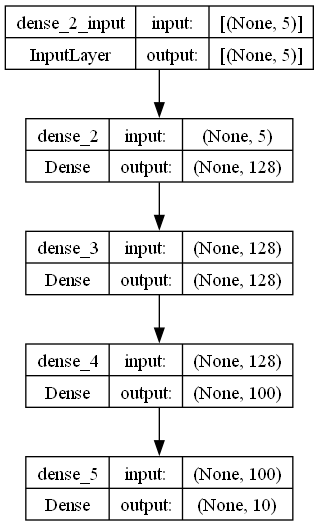

In [8]:
from tensorflow.keras.utils import plot_model

# Guardar el diagrama como una imagen
plot_model(modelo_mlp, to_file='modelo final.png', show_shapes=True, show_layer_names=True)

In [2]:
import matplotlib.pyplot as plt

# Entrenar el modelo
historial_entrenamiento = modelo_mlp.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

# Graficar la pérdida en el conjunto de entrenamiento y validación
plt.plot(historial_entrenamiento.history['loss'], label='Training Loss')
plt.plot(historial_entrenamiento.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('loss_plot.png')  # Guardar el gráfico de pérdida como imagen
plt.show()

# Graficar la precisión en el conjunto de entrenamiento y validación
plt.plot(historial_entrenamiento.history['accuracy'], label='Training Accuracy')
plt.plot(historial_entrenamiento.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.savefig('accuracy_plot.png')  # Guardar el gráfico de precisión como imagen
plt.show()


NameError: name 'modelo_mlp' is not defined

188/188 [==============================] - 0s 982us/step


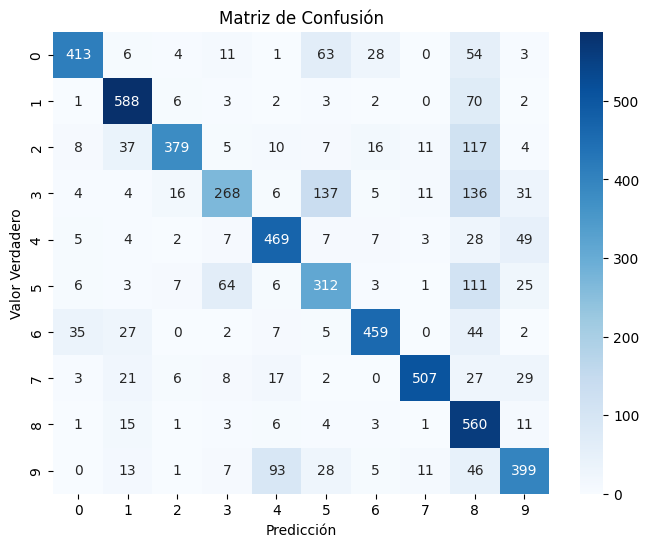

In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calcula las predicciones del modelo en el conjunto de prueba
y_pred = modelo_mlp.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Verdadero")

# Guardar la imagen
plt.savefig('matriz_confusion_unagenteiziquierda.png')

plt.show()


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler


# Concatenar los resultados de ambos CSV
resultados_totales = pd.read_csv("resultados_totales_agenteuno.csv")

# Obtener las características de entrada (X) y las etiquetas verdaderas (y)
X = resultados_totales.drop('Etiqueta_Verdadera', axis=1)
y = resultados_totales['Etiqueta_Verdadera']

# One-hot encode las etiquetas para clasificación multiclase
y_one_hot = to_categorical(y, num_classes=10)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba utilizando el mismo escalador
X_test_scaled = scaler.transform(X_test)
# Definir la arquitectura del modelo
modelo_mlp = Sequential()
modelo_mlp.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
modelo_mlp.add(Dense(128, activation='relu'))
modelo_mlp.add(Dense(100, activation='relu'))
modelo_mlp.add(Dense(10, activation='softmax'))  # 10 para 10 clases

# Compilar el modelo
modelo_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
modelo_mlp.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = modelo_mlp.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Guardar el modelo entrenado
modelo_mlp.save('modelo_mlp.h5')  # Puedes cambiar el nombre del archivo según tu preferencia


Epoch 1/40
200/200 [==============================] - 2s 3ms/step - loss: 1.7455 - accuracy: 0.4427 - val_loss: 1.5211 - val_accuracy: 0.5200
Epoch 2/40
200/200 [==============================] - 0s 2ms/step - loss: 1.4183 - accuracy: 0.5553 - val_loss: 1.3291 - val_accuracy: 0.5725
Epoch 3/40
200/200 [==============================] - 0s 2ms/step - loss: 1.2901 - accuracy: 0.5964 - val_loss: 1.2711 - val_accuracy: 0.6137
Epoch 4/40
200/200 [==============================] - 0s 2ms/step - loss: 1.2064 - accuracy: 0.6208 - val_loss: 1.1938 - val_accuracy: 0.6187
Epoch 5/40
200/200 [==============================] - 0s 2ms/step - loss: 1.1723 - accuracy: 0.6384 - val_loss: 1.1777 - val_accuracy: 0.6481
Epoch 6/40
200/200 [==============================] - 0s 2ms/step - loss: 1.1269 - accuracy: 0.6491 - val_loss: 1.1076 - val_accuracy: 0.6675
Epoch 7/40
200/200 [==============================] - 0s 2ms/step - loss: 1.0868 - accuracy: 0.6611 - val_loss: 1.1071 - val_accuracy: 0.6538
Epoch 

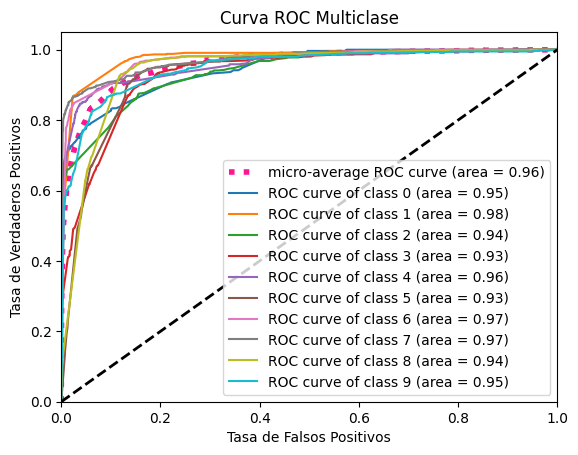

In [11]:
from sklearn.metrics import roc_curve, auc

# Obtener el número de clases
num_classes = y_test.shape[1]

# Calcular la curva ROC y el área bajo la curva para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular el micro-average ROC curve y el micro-average AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Graficar la curva ROC para cada clase y el micro-average ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["micro"]), color='deeppink', linestyle=':', linewidth=4)

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Multiclase')
plt.legend(loc="lower right")

# Guardar la curva ROC como una imagen
plt.savefig('curva_rocunagenteizquerda.png')

plt.show()


In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model

# Cargar los modelos preentrenados
modelo1 = load_model('mnist_cnn_model_completa.h5')  # Reemplaza 'modelo1.h5' con el nombre real de tu modelo
modelo2 = load_model('mnist_cnn_model_derecha.h5')
modelo3 = load_model('mnist_cnn_model_izquierda.h5')
modelo4 = load_model('mnist_cnn_model_abajo.h5')
modelo5 = load_model('mnist_cnn_model_arriba.h5')

modelo6 = load_model('mnist_cnn_model_completa.h5')
modelo7 = load_model('mnist_cnn_model_derecha.h5')
modelo8 = load_model('mnist_cnn_model_izquierda.h5')
modelo9 = load_model('mnist_cnn_model_abajo.h5')
modelo10 = load_model('mnist_cnn_model_arriba.h5')


# Cargar los datos de entrada (CSV)
datos_csv1 = pd.read_csv('mnist_izquierdageneral_test.csv')  # Reemplaza 'datos_csv1.csv' con el nombre real de tu archivo CSV
datos_csv2 = pd.read_csv('mnist_derechageneral_test.csv')

# Guardar las etiquetas verdaderas antes de eliminar la columna 'label'
etiquetas_verdaderas_csv1 = datos_csv1['label'].values
etiquetas_verdaderas_csv2 = datos_csv2['label'].values

# Eliminar la columna 'label' de los datos de entrada
datos_csv1 = datos_csv1.drop('label', axis=1)
datos_csv2 = datos_csv2.drop('label', axis=1)

# Preprocesamiento de datos (ajústalo según tus necesidades)
# ...

# Reformatear los datos de entrada para que coincidan con las expectativas del modelo
datos_csv1 = datos_csv1.values.reshape(-1, 28, 28, 1)
datos_csv2 = datos_csv2.values.reshape(-1, 28, 28, 1)

# Realizar predicciones con los modelos
predicciones_csv1_modelo1 = modelo1.predict(datos_csv1)
predicciones_csv1_modelo2 = modelo2.predict(datos_csv1)
predicciones_csv1_modelo3 = modelo3.predict(datos_csv1)
predicciones_csv1_modelo4 = modelo4.predict(datos_csv1)
predicciones_csv1_modelo5 = modelo5.predict(datos_csv1)


predicciones_csv2_modelo6 = modelo6.predict(datos_csv2)
predicciones_csv2_modelo7 = modelo7.predict(datos_csv2)
predicciones_csv2_modelo8 = modelo8.predict(datos_csv2)
predicciones_csv2_modelo9 = modelo9.predict(datos_csv2)
predicciones_csv2_modelo10 = modelo10.predict(datos_csv2)



# Obtener las clases predichas
clases_predichas_csv1_modelo1 = np.argmax(predicciones_csv1_modelo1, axis=1)
clases_predichas_csv1_modelo2 = np.argmax(predicciones_csv1_modelo2, axis=1)
clases_predichas_csv1_modelo3 = np.argmax(predicciones_csv1_modelo3, axis=1)
clases_predichas_csv1_modelo4 = np.argmax(predicciones_csv1_modelo4, axis=1)
clases_predichas_csv1_modelo5 = np.argmax(predicciones_csv1_modelo5, axis=1)


clases_predichas_csv2_modelo6 = np.argmax(predicciones_csv2_modelo6, axis=1)
clases_predichas_csv2_modelo7 = np.argmax(predicciones_csv2_modelo7, axis=1)
clases_predichas_csv2_modelo8 = np.argmax(predicciones_csv2_modelo8, axis=1)
clases_predichas_csv2_modelo9 = np.argmax(predicciones_csv2_modelo9, axis=1)
clases_predichas_csv2_modelo10 = np.argmax(predicciones_csv2_modelo10, axis=1)



# Crear un DataFrame con una sola columna para las etiquetas verdaderas y predicciones de todos los modelos
resultados_totales = pd.DataFrame({
    'Etiqueta_Verdadera': etiquetas_verdaderas_csv1,  # O podrías usar etiquetas_verdaderas_csv2, ya que son iguales
    'Prediccion_Modelo1_csv1': clases_predichas_csv1_modelo1,
    'Prediccion_Modelo2_csv1': clases_predichas_csv1_modelo2,
    'Prediccion_Modelo3_csv1': clases_predichas_csv1_modelo3,
    'Prediccion_Modelo4_csv1': clases_predichas_csv1_modelo4,
    'Prediccion_Modelo5_csv1': clases_predichas_csv1_modelo5,
    'Prediccion_Modelo6_csv2': clases_predichas_csv2_modelo6,
    'Prediccion_Modelo7_csv2': clases_predichas_csv2_modelo7,
    'Prediccion_Modelo8_csv2': clases_predichas_csv2_modelo8,
    'Prediccion_Modelo9_csv2': clases_predichas_csv2_modelo9,
    'Prediccion_Modelo10_csv2': clases_predichas_csv2_modelo10,
    
    
})
#})
# Agregar una columna para representar la predicción del modelo (1: derecho, 2: izquierda, 3: completa)
#resultados_totales['lado'] = resultados_totales.apply(lambda row: 1 if 'Prediccion_Modelo2_csv1' in row.index and row['Prediccion_Modelo5_csv2'] == 1
                                                                   # else (2 if 'Prediccion_Modelo3_csv1' in row.index and row['Prediccion_Modelo6_csv2'] == 1
                                                                   # else 3), axis=1)



# Guardar el DataFrame en un archivo CSV
resultados_totales.to_csv('resultados_totales_dosagentes.csv', index=False)
# resultados_totales_lado.csv ambos agentes más lado resultados_totales_unagente.csv agente izquierdo

938/938 [==============================] - 3s 3ms/step


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler


# Concatenar los resultados de ambos CSV
resultados_totales = pd.read_csv("resultados_totales_dosagentes.csv")

# Obtener las características de entrada (X) y las etiquetas verdaderas (y)
X = resultados_totales.drop('Etiqueta_Verdadera', axis=1)
y = resultados_totales['Etiqueta_Verdadera']

# One-hot encode las etiquetas para clasificación multiclase
y_one_hot = to_categorical(y, num_classes=10)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba utilizando el mismo escalador
X_test_scaled = scaler.transform(X_test)
# Definir la arquitectura del modelo
modelo_mlp = Sequential()
modelo_mlp.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
modelo_mlp.add(Dense(128, activation='relu'))
modelo_mlp.add(Dense(100, activation='relu'))
modelo_mlp.add(Dense(10, activation='softmax'))  # 10 para 10 clases

# Compilar el modelo
modelo_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
modelo_mlp.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = modelo_mlp.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Guardar el modelo entrenado
modelo_mlp.save('modelo_mlp.h5')  # Puedes cambiar el nombre del archivo según tu preferencia


Epoch 1/40
600/600 [==============================] - 2s 2ms/step - loss: 1.2917 - accuracy: 0.5800 - val_loss: 1.0104 - val_accuracy: 0.6762
Epoch 2/40
600/600 [==============================] - 1s 2ms/step - loss: 0.8911 - accuracy: 0.7243 - val_loss: 0.8315 - val_accuracy: 0.7427
Epoch 3/40
600/600 [==============================] - 1s 2ms/step - loss: 0.7807 - accuracy: 0.7593 - val_loss: 0.7495 - val_accuracy: 0.7723
Epoch 4/40
600/600 [==============================] - 1s 2ms/step - loss: 0.7087 - accuracy: 0.7845 - val_loss: 0.6803 - val_accuracy: 0.7946
Epoch 5/40
600/600 [==============================] - 1s 2ms/step - loss: 0.6636 - accuracy: 0.7966 - val_loss: 0.6614 - val_accuracy: 0.8029
Epoch 6/40
600/600 [==============================] - 1s 2ms/step - loss: 0.6344 - accuracy: 0.8037 - val_loss: 0.6594 - val_accuracy: 0.8019
Epoch 7/40
600/600 [==============================] - 1s 2ms/step - loss: 0.6102 - accuracy: 0.8118 - val_loss: 0.6233 - val_accuracy: 0.8112
Epoch 